In [1]:
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import UpSampling2D, Flatten, Reshape
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float') / 255


In [5]:
autoencoder = Sequential()
# encoding 
autoencoder.add(Conv2D(16, kernel_size = 3, padding='same', input_shape = (28,28,1),
                       activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size = 3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, activation='relu', padding='same'))

#decoding 
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation ='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation= 'relu'))
autoencoder.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 8)          

In [6]:
autoencoder.compile(loss='binary_crossentropy', optimizer = 'adam')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test,X_test))


Epoch 1/50
469/469 [==============================] - 37s 78ms/step - loss: 0.2049 - val_loss: 0.1657
Epoch 2/50
469/469 [==============================] - 37s 78ms/step - loss: 0.1806 - val_loss: 0.1640
Epoch 3/50
469/469 [==============================] - 37s 78ms/step - loss: 0.1686 - val_loss: 0.1504
Epoch 4/50
469/469 [==============================] - 36s 77ms/step - loss: 0.1549 - val_loss: 0.1787
Epoch 5/50
469/469 [==============================] - 36s 77ms/step - loss: 0.1689 - val_loss: 0.1468
Epoch 6/50
469/469 [==============================] - 37s 80ms/step - loss: 0.1467 - val_loss: 0.1428
Epoch 7/50
469/469 [==============================] - 37s 80ms/step - loss: 0.2037 - val_loss: 0.1706
Epoch 8/50
469/469 [==============================] - 36s 77ms/step - loss: 0.1834 - val_loss: 0.2818
Epoch 9/50
469/469 [==============================] - 37s 80ms/step - loss: 0.2083 - val_loss: 0.2116
Epoch 10/50
469/469 [==============================] - 38s 81ms/step - loss: 0.178

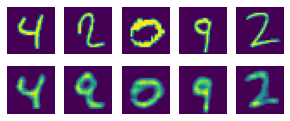

In [8]:
random_test = np.random.randint(X_test.shape[0], size=5)
ae_imgs = autoencoder.predict(X_test)
plt.figure(figsize =(7,2))
for i, image_idx in enumerate(random_test):
    ax = plt.subplot(2, 7, i+1)
    plt.imshow(X_test[image_idx].reshape(28, 28))
    ax.axis('off')
    ax = plt.subplot(2, 7, 7 + i + 1)
    plt.imshow(ae_imgs[image_idx].reshape(28, 28))
    ax.axis('off')
    
plt.show()